# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load Dataset

In [2]:
car = pd.read_csv("car.csv")

In [3]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
car.shape

(301, 9)

In [6]:
car.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [8]:
car.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [9]:
print(car["Fuel_Type"].value_counts())
print(car["Selling_type"].value_counts())
print(car["Transmission"].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Selling_type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


# Data Visualization

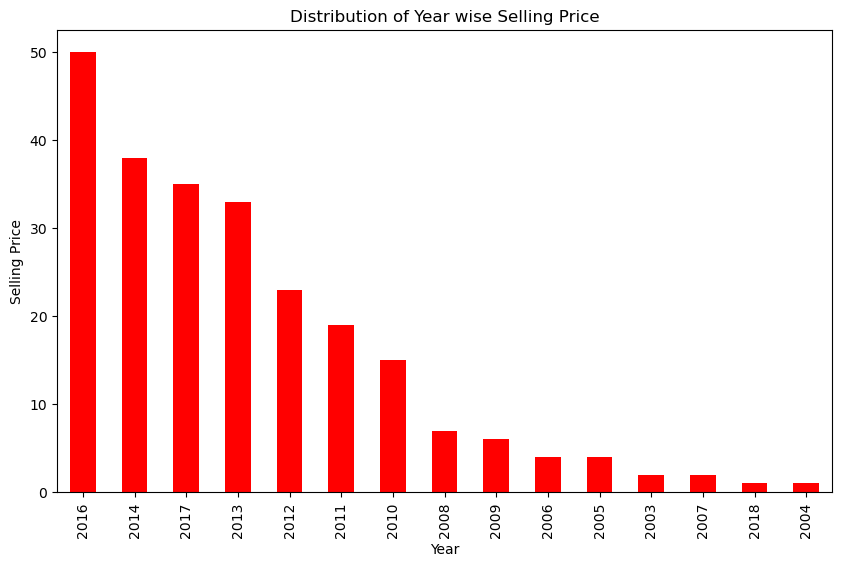

In [25]:
car["Year"].value_counts()[1:16].plot(kind = "bar", color = "red", figsize=(10,6))
plt.title("Distribution of Year wise Selling Price")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.show()

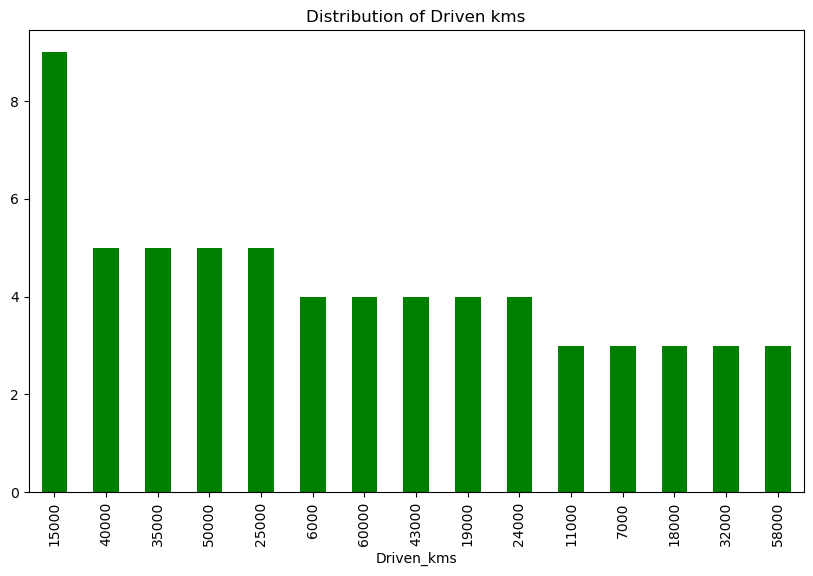

In [27]:
car["Driven_kms"].value_counts()[1:16].plot(kind = "bar", color = "green", figsize=(10,6))
plt.title("Distribution of Driven kms")
plt.xlabel("Driven_kms")
plt.show()

<Axes: xlabel='Selling_type', ylabel='count'>

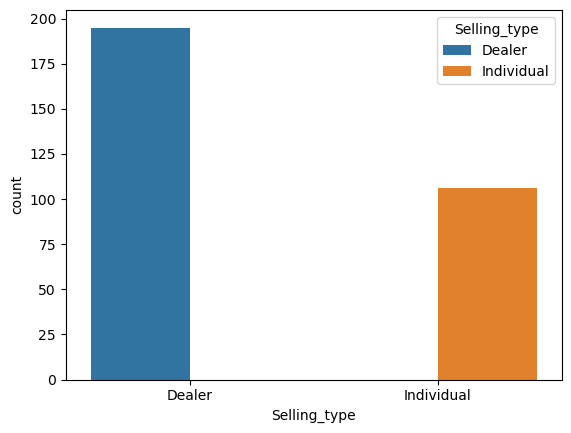

In [17]:
sns.countplot(x='Selling_type',hue='Selling_type',data=car)

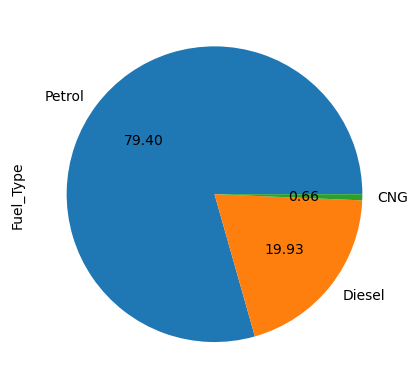

In [19]:
car['Fuel_Type'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title("")
plt.show()

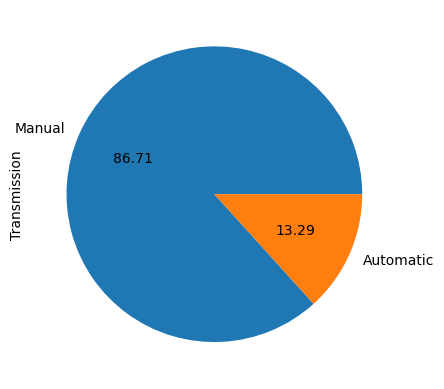

In [20]:
car['Transmission'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title("")
plt.show()

# Encoding the categorical data

In [28]:
car.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}}, inplace = True)
car.replace({"Selling_type":{"Dealer":0,"Individual":1}}, inplace = True)
car.replace({"Transmission":{"Manual":0,"Automatic":1,}}, inplace = True)

In [29]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Model Evaluation

In [31]:
X = car.drop(["Car_Name", "Selling_Price"],axis= 1)
Y =car["Selling_Price"]

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state= 2)
print(X.shape, X_train.shape, Y_test.shape)

(301, 7) (210, 7) (91,)


In [33]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [34]:
X_train_prediction = model.predict(X_train)
error_square = metrics.r2_score(X_train_prediction, Y_train)

In [35]:
print("R Squared Error(Training Data): ",error_square)

R Squared Error(Training Data):  0.8713467326654583


In [36]:
X_test_prediction = model.predict(X_test)
error_square = metrics.r2_score(X_test_prediction, Y_test)

In [37]:
print("R Squared Error(Testing Data): ",error_square)

R Squared Error(Testing Data):  0.7996393345343008


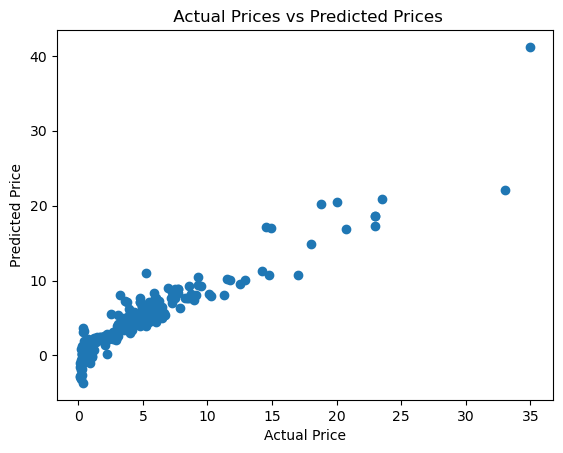

In [38]:
plt.scatter(Y_train, X_train_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

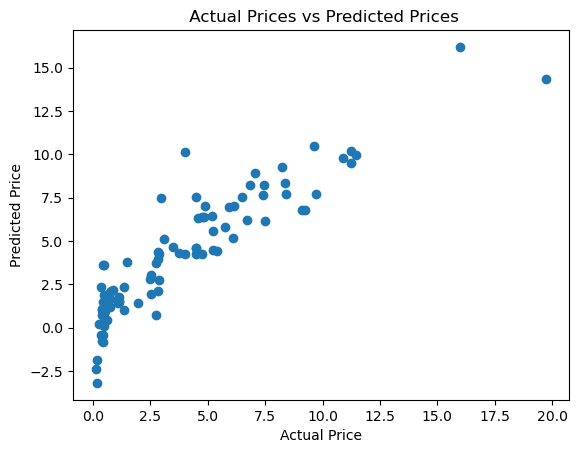

In [39]:
plt.scatter(Y_test, X_test_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# Predictive Model

In [40]:
data_new = pd.DataFrame({
    'Year':2014,
    'Present_Price':5.59,
    'Driven_kms':27000,
    'Fuel_Type':0,
    'Selling_type':0,
    'Transmission':0,
    'Owner':0
},index=[0])

In [41]:
model.predict(data_new)

array([3.8466256])